In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import plotly.express as px
#import geopandas as gpd
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Read the datasets

In [2]:
# Read the URLs
url1 = 'https://www.wolframcloud.com/obj/mar/Hamoye/Session%202/Data/Africa%20Food%20Production%20(2004%20-%202013).csv'
url2 = 'https://www.wolframcloud.com/obj/mar/Hamoye/Session%202/Data/Africa%20Food%20Supply%20(2004%20-%202013).csv'

# Read the food production data
production = pd.read_csv(url1)

# Read the food supply data
supply = pd.read_csv(url2)

## Food Production dataset

In [3]:
print(production.shape)
production.head()

(23110, 4)


,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


In [4]:
# check data information
production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


In [5]:
# Check for missing values
production.isnull().sum()

Country    0
Item       0
Year       0
Value      0
dtype: int64

In [6]:
# Checking for number of unique features
production.nunique()

Country      45
Item         94
Year         10
Value      2134
dtype: int64

In [7]:
# Summary statistics for food production data
production.describe()

,Year,Value
count,23110.000000,23110.000000
mean,2008.498269,327.785201
std,2.871740,1607.940343
min,2004.000000,0.000000
25%,2006.000000,3.000000
50%,2008.000000,18.000000
75%,2011.000000,108.000000
max,2013.000000,54000.000000


Converting the `Year` column of the `africa_productionuction.csv` and `africa_supply.csv` datasets to an ordered categorical column can help  create better visualizations, perform better analysis, and prevent errors in analysis.

In [8]:
# Converting the 'Year' column to an ordered categorical column
production['Year'] = production['Year'].astype('category')
production['Year'] = production['Year'].cat.reorder_categories(range(2004, 2014), ordered=True)

supply['Year'] = supply['Year'].astype('category')
supply['Year'] = supply['Year'].cat.reorder_categories(range(2004, 2014), ordered=True)

## Exploratory Data Analysis for Food production dataset

### What is the trend over time of food production in Africa?

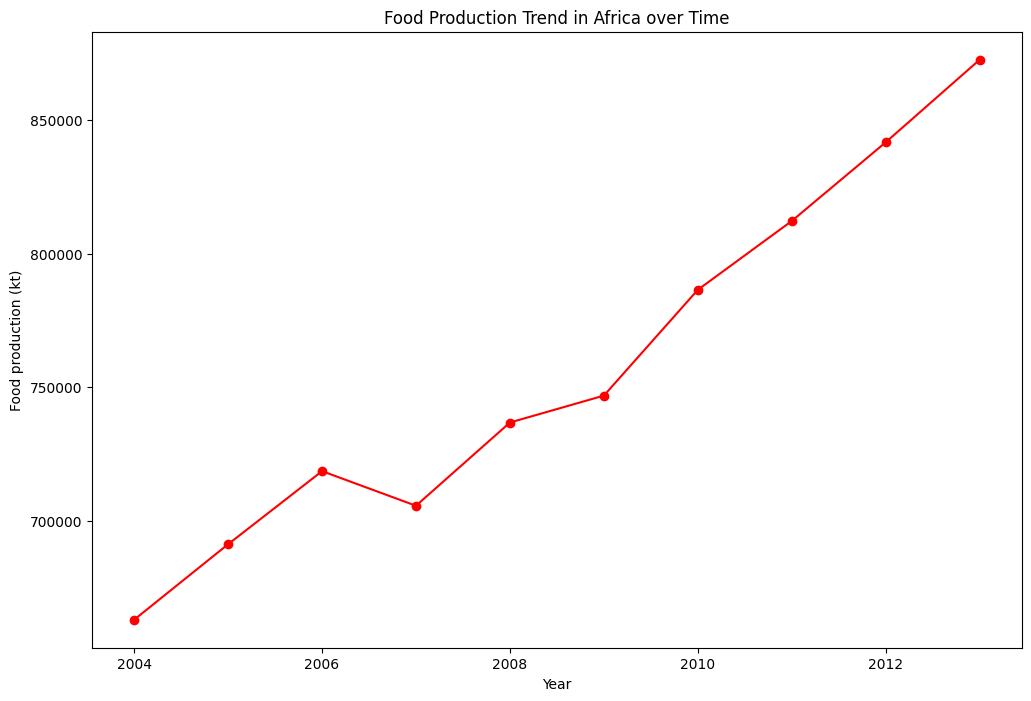

In [9]:
# Visualize food production over time
plt.figure(figsize=(12, 8))
prod_trend = production.groupby('Year')['Value'].sum()
prod_trend.plot(kind='line', marker='o', color='red', title='Food Production Trend in Africa over Time')
plt.xlabel('Year')
plt.ylabel('Food production (kt)')
plt.show()

In [10]:
prod_trend

Year
2004    663006
2005    691257
2006    718602
2007    705659
2008    736804
2009    746870
2010    786466
2011    812214
2012    841667
2013    872571
Name: Value, dtype: int64

In [11]:
# Group the production data by country by year
prod_by_country = production.groupby(['Country', 'Year'])
prod_by_country.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111
...,...,...,...,...
22515,Zimbabwe,Oats,2009,1
22516,Zimbabwe,Oats,2010,1
22517,Zimbabwe,Oats,2011,1
22518,Zimbabwe,Oats,2012,1


In [12]:
# Group the production data by country by year
prod_by_year = production.groupby(['Country', 'Year']).sum()
prod_by_year

Value
Country  Year       
Algeria  2004  15536
         2005  15667
         2006  16417
         2007  14763
         2008  13841
...              ...
Zimbabwe 2009   5754
         2010   6777
         2011   7551
         2012   8173
         2013   7914

[450 rows x 1 columns]

In [13]:
# Group the production data by country by year
prod_by_country = production.groupby(['Country', 'Item']).sum()
prod_by_country

Value
Country  Item                        
Algeria  Apples and products     3003
         Bananas                    0
         Barley and products    12770
         Beans                     11
         Beer                    1358
...                               ...
Zimbabwe Tea (including mate)     197
         Tomatoes and products    204
         Vegetables, Other       1749
         Wheat and products       996
         Wine                      20

[2312 rows x 1 columns]

### Countries and their unique products

In [14]:
# Group the data by country and count the number of unique products for each country
country_product_counts = production.groupby('Country')['Item'].nunique()

# Sort the countries
sorted_countries = country_product_counts.sort_values(ascending=False)

# Print the countries and their corresponding number of unique products
for country, count in sorted_countries.items():
    print(f"{country}: {count} unique products")

United Republic of Tanzania: 79 unique products
Morocco: 77 unique products
South Africa: 75 unique products
Kenya: 75 unique products
Egypt: 70 unique products
Madagascar: 69 unique products
Cameroon: 65 unique products
Cote d'Ivoire: 64 unique products
Zimbabwe: 64 unique products
Mozambique: 62 unique products
Tunisia: 61 unique products
Nigeria: 61 unique products
Ethiopia: 60 unique products
Benin: 59 unique products
Algeria: 58 unique products
Ghana: 58 unique products
Uganda: 56 unique products
Togo: 56 unique products
Sudan: 55 unique products
Angola: 54 unique products
Senegal: 52 unique products
Sierra Leone: 50 unique products
Congo: 50 unique products
Guinea: 50 unique products
Malawi: 48 unique products
Zambia: 48 unique products
Mali: 48 unique products
Rwanda: 46 unique products
Mauritius: 46 unique products
Central African Republic: 45 unique products
Guinea-Bissau: 44 unique products
Burkina Faso: 43 unique products
Niger: 43 unique products
Namibia: 43 unique products

In [15]:
# Group the production data by country
prod_by_country = production.groupby('Country')['Value'].sum()

prod_by_country_sorted = pd.DataFrame({
    'Country': prod_by_country.index,
    'Total Production': prod_by_country.values}).sort_values(
        by='Total Production', ascending=False)
prod_by_country_sorted

,Country,Total Production
31,Nigeria,1628030
12,Egypt,877498
36,South Africa,579592
13,Ethiopia,350693
42,United Republic of Tanzania,332802
37,Sudan,301584
16,Ghana,295004
41,Uganda,278421
27,Morocco,271821
19,Kenya,256872


# What is the trend over time of food production in Africa?

Top 10 countries in food production:
 Country
Nigeria                        1628030
Egypt                           877498
South Africa                    579592
Ethiopia                        350693
United Republic of Tanzania     332802
Sudan                           301584
Ghana                           295004
Uganda                          278421
Morocco                         271821
Kenya                           256872
Name: Value, dtype: int64


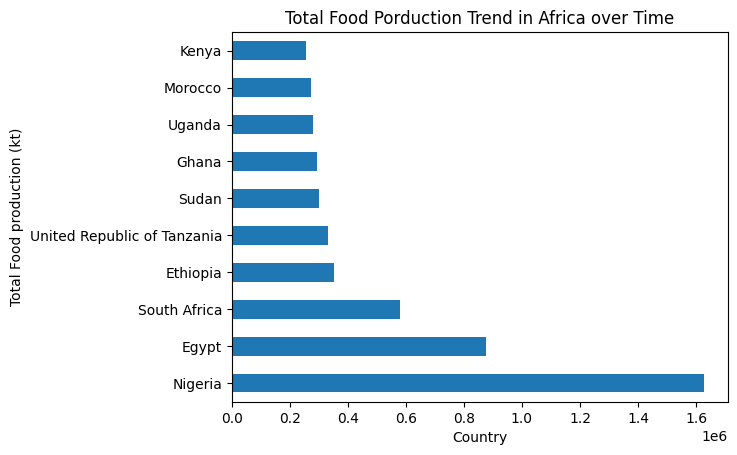

In [16]:
# What countries produced the most (top 10) and least food?
top10_countries = production.groupby('Country')['Value'].sum().nlargest(10)
print('Top 10 countries in food production:\n', top10_countries)

# Plot the bar chart of Top 10 countries over time
top10_countries.plot(kind='barh', title='Total Food Porduction Trend in Africa over Time')
plt.xlabel('Country')
plt.ylabel('Total Food production (kt)')
plt.show()

This plot shows the total food production by country. It helps us identify countries with high or low production levels. The top five countries with the highest production levels are `Nigeria`, `Egypt`, `South Africa` `Ethiopia` and `Tanzania`. On the other hand, `Djibouti`, `Sao Tome and Principe` and `Cabo Verde` has the lowest production levels.

In [17]:
# Create a dictionary that maps each top 5 country to its corresponding value
country_to_value = dict(zip(production['Country'], production['Value']))

# Creating a choropleth map of Top 5 Food Producing Countries in Africa
fig = px.choropleth(
    locations=["Nigeria", "Egypt", "South Africa", "Ethiopia", "United Republic of Tanzania"],
    locationmode="country names",
    scope='africa',
    color=[country_to_value[country] for country in ["Nigeria", "Egypt", "South Africa", "Ethiopia", "United Republic of Tanzania"]],
    title='Top 5 Food Producing Countries in Africa')

plt.savefig("./images/map-1.png", dpi=150)

# Show the figure
fig.show();

<Figure size 640x480 with 0 Axes>

## Which countries produced the least food?

Least 10 countries in food production:
 Country
Djibouti                   666
Sao Tome and Principe     1152
Cabo Verde                1658
Lesotho                   3785
Gambia                    4699
Botswana                  4808
Guinea-Bissau             7296
Mauritania               10039
Gabon                    13566
Namibia                  14197
Name: Value, dtype: int64


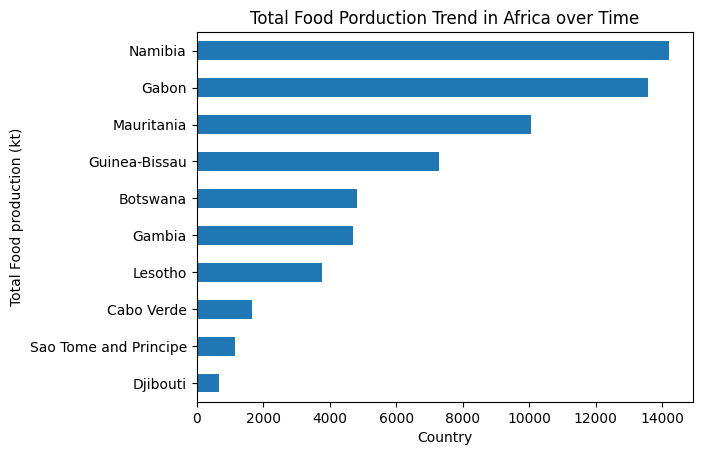

In [18]:
least_countries = production.groupby('Country')['Value'].sum().nsmallest(10)
print('Least 10 countries in food production:\n', least_countries)

# Plot the bar chart of Least 10 countries over time
least_countries.plot(kind='barh', title='Total Food Porduction Trend in Africa over Time')
plt.xlabel('Country')
plt.ylabel('Total Food production (kt)')
plt.show()

### Food production by crop category

## What food products were produced the most?

In [19]:
# Group the production data by crop category
prod_by_category = production.groupby('Item')['Value'].sum()

prod_by_category_sorted = pd.DataFrame({
    'Item': prod_by_category.index,
    'Total Production': prod_by_category.values}).sort_values(
        by='Total Production', ascending=False)
prod_by_category_sorted.set_index('Item', inplace=True)
prod_by_category_sorted

,Total Production
Item,
Cassava and products,1118948
Sugar cane,887008
Maize and products,574948
Yams,511523
"Vegetables, Other",410403
...,...
Cloves,249
"Molluscs, Other",214
Pepper,199


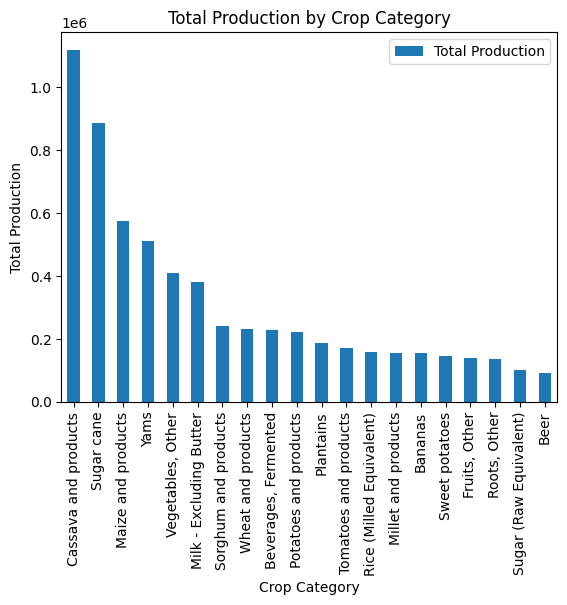

In [20]:
# Plot the food production by crop category
top_20_crops = prod_by_category_sorted.nlargest(20, columns='Total Production')
top_20_crops.plot(
    kind="bar",
    xlabel="Crop Category",
    ylabel="Total Production",
    title="Total Production by Crop Category"
)
plt.xticks(rotation=90)
plt.show();

## What food products were the least produced?

Least produced food products:
 Item
Aquatic Animals, Others     13
Fish, Liver Oil             28
Pepper                     199
Molluscs, Other            214
Cloves                     249
Fish, Body Oil             403
Cream                      413
Rape and Mustard Oil       437
Sugar non-centrifugal      686
Rye and products           846
Name: Value, dtype: int64


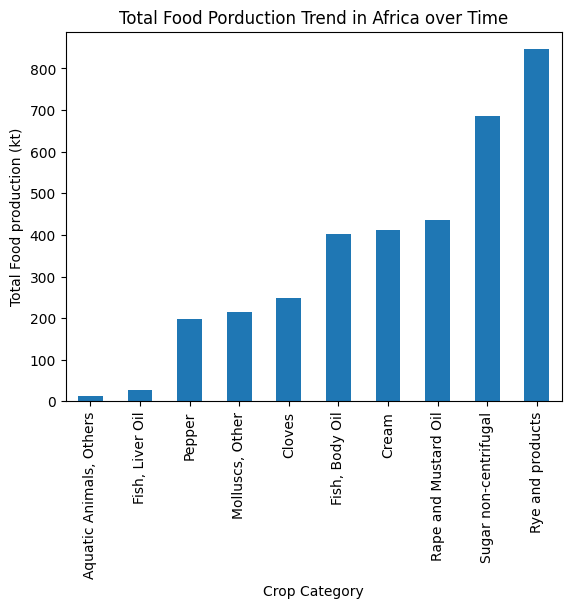

In [21]:
least_products = production.groupby('Item')['Value'].sum().nsmallest(10)
print('Least produced food products:\n', least_products)

# Plot the bar chart of Least 10 countries over time
least_products.plot(kind='bar', title='Total Food Porduction Trend in Africa over Time')
plt.xlabel('Crop Category')
plt.ylabel('Total Food production (kt)')
plt.show()

### Identifying Outliers in food production

In [22]:
# Do we have outlier countries in food production data between 2004 and 2013?
outliers = production[(production['Year'] >= 2004) & (production['Year'] <= 2013)].groupby('Country')['Value'].sum().nlargest(5)
print('Outlier countries in food production data between 2004 and 2013:\n', outliers)

Outlier countries in food production data between 2004 and 2013:
 Country
Nigeria                        1628030
Egypt                           877498
South Africa                    579592
Ethiopia                        350693
United Republic of Tanzania     332802
Name: Value, dtype: int64


In [23]:
# Load the African countries GeoJSON file
african_countries = json.load(open("african_countries.geojson"))

# Create a chloropleth map of African countries
fig = px.choropleth(
    production,
    geojson=african_countries,
    locations=production["Country"],
    locationmode='country names',
    color=production['Value'],
    scope='africa',
    hover_name=production['Country'],
    color_continuous_midpoint=500,
    color_continuous_scale=px.colors.sequential.Plasma,
    animation_frame=production['Year'],
    width=600,   # Width of map
    height=600,   # Height of map

)

fig.update_layout(title='Food Production in Africa by Country and Year',
                  margin={'l': 0, 'r': 0, 't': 50, 'b': 0})

plt.savefig("./images/map-2.png", dpi=150)

# Display the map
fig.show();

<Figure size 640x480 with 0 Axes>

## Which country produced the highest amount of oats in 2010?

In [24]:
# Filtering the data for oats and the year 2010
top_oats = production[(production['Item'] == 'Oats') & (production['Year'] == 2010)]

# Finding the country with the highest oat production
max_production = top_oats.loc[top_oats['Value'].idxmax()]
print('The country with the highest oat production')
print(max_production['Country'])

The country with the highest oat production
Algeria


### What three countries have produced the highest total quantity of rice from 2004 to 2013?

In [25]:
# Get the top 3 countries with the highest total rice production
rice_df = production[(production['Item'] == 'Rice (Milled Equivalent)') & (production['Year'] >= 2004) & (production['Year'] <= 2013)]

# Group the DataFrame by country and calculate the sum of the values for each country:
country_rice_production = rice_df.groupby('Country')['Value'].sum().reset_index()

# Sort the DataFrame in descending order based on the total rice production:
sorted_country_rice_production = country_rice_production.sort_values('Value', ascending=False)
top_3_countries = sorted_country_rice_production.head(3)

# Print the result:
print(top_3_countries)

       Country  Value
9        Egypt  40370
26     Nigeria  26964
18  Madagascar  26118


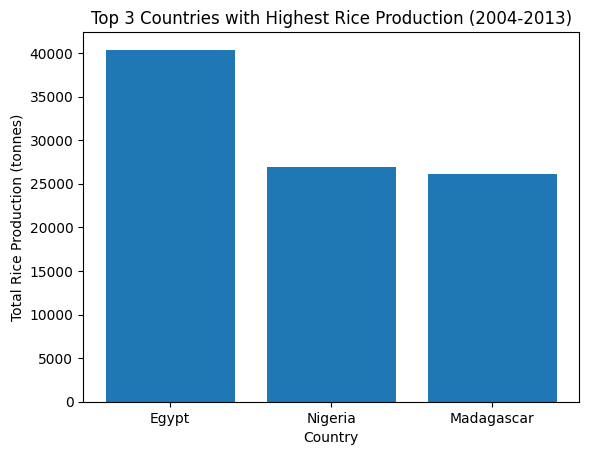

In [26]:
# Plot the bar chart for top 3 rice producing countries
plt.bar(top_3_countries['Country'], top_3_countries['Value'])
plt.title('Top 3 Countries with Highest Rice Production (2004-2013)')
plt.xlabel('Country')
plt.ylabel('Total Rice Production (tonnes)')
plt.show()

### What three countries have produced the highest total quantity of cassava and products from 2004 to 2013?

In [27]:
# Get the top 3 countries with the highest total rice production
cassava_df = production[(production['Item'] == 'Cassava and products') & (production['Year'] >= 2004) & (production['Year'] <= 2013)]

# Group the DataFrame by country and calculate the sum of the values for each country:
country_cassava_production = cassava_df.groupby('Country')['Value'].sum().reset_index()

# Sort the DataFrame in descending order based on the total rice production:
sorted_country_cassava_production = country_cassava_production.sort_values('Value', ascending=False)
top_3_cassava = sorted_country_cassava_production.head(3)

# Print the result:
print(top_3_cassava)

    Country   Value
22  Nigeria  452881
11    Ghana  121026
0    Angola  114286


### What three countries have produced the highest total quantity of Maize and products from 2004 to 2013?

In [28]:
# Get the top 3 countries with the highest total rice production
maize_df = production[(production['Item'] == 'Maize and products') & (production['Year'] >= 2004) & (production['Year'] <= 2013)]

# Group the DataFrame by country and calculate the sum of the values for each country:
country_maize_production = maize_df.groupby('Country')['Value'].sum().reset_index()

# Sort the DataFrame in descending order based on the total rice production:
sorted_country_maize_production = country_maize_production.sort_values('Value', ascending=False)
top_3_maize = sorted_country_maize_production.head(3)

# Print the result:
print(top_3_maize)

         Country   Value
35  South Africa  107343
30       Nigeria   76898
12         Egypt   70993


### Countries with the highest production for each Crop Category (Item)

In [29]:
# Group the DataFrame by item and find the country with the highest production for each item
top_countries = production.groupby('Item')['Value'].idxmax()
top_countries_data = production.loc[top_countries, ['Item', 'Country', 'Value']]

# Sort the result
sorted_top_countries_data = top_countries_data.sort_values('Value', ascending=False)
sorted_top_countries_data.head(20)

,Item,Country,Value
15448,Cassava and products,Nigeria,54000
15479,Yams,Nigeria,40500
17871,Sugar cane,South Africa,21265
17796,Maize and products,South Africa,12815
5975,Tomatoes and products,Egypt,10279
5769,Sugar beet,Egypt,10044
15422,Sorghum and products,Nigeria,9866
20960,Plantains,Uganda,9686
15815,"Beverages, Fermented",Nigeria,9478
5669,Wheat and products,Egypt,9460


### Food Supply


In [30]:
supply.head(10)

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048
5,Algeria,2009,3110
6,Algeria,2010,3142
7,Algeria,2011,3217
8,Algeria,2012,3272
9,Algeria,2013,3296


In [31]:
supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Country  450 non-null    object  
 1   Year     450 non-null    category
 2   Value    450 non-null    int64   
dtypes: category(1), int64(1), object(1)
memory usage: 7.7+ KB


In [32]:
# Check for number of unique values
supply.nunique()

Country     45
Year        10
Value      373
dtype: int64

In [33]:
# Summary statistics for food supply
supply.describe()

,Value
count,450.000000
mean,2469.775556
std,379.140143
min,1781.000000
25%,2174.000000
50%,2376.000000
75%,2681.750000
max,3561.000000


In [34]:
# summary statistics for 2012
supply.query('Year == 2012')['Value'].describe()

count      45.000000
mean     2527.644444
std       388.466926
min      1923.000000
25%      2200.000000
50%      2414.000000
75%      2707.000000
max      3561.000000
Name: Value, dtype: float64

## What is the trend over time of food supply in Africa?

In [35]:
# Group by Country
supply_trend = supply.groupby(['Country', 'Year'])
supply_trend.head()

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048
...,...,...,...
445,Zimbabwe,2009,2147
446,Zimbabwe,2010,2168
447,Zimbabwe,2011,2200
448,Zimbabwe,2012,2197


In [36]:
# Group by Country and Year
supply_trend = supply.groupby(['Country', 'Year'])
supply_trend.first()

Value
Country  Year       
Algeria  2004   2987
         2005   2958
         2006   3047
         2007   3041
         2008   3048
...              ...
Zimbabwe 2009   2147
         2010   2168
         2011   2200
         2012   2197
         2013   2110

[450 rows x 1 columns]

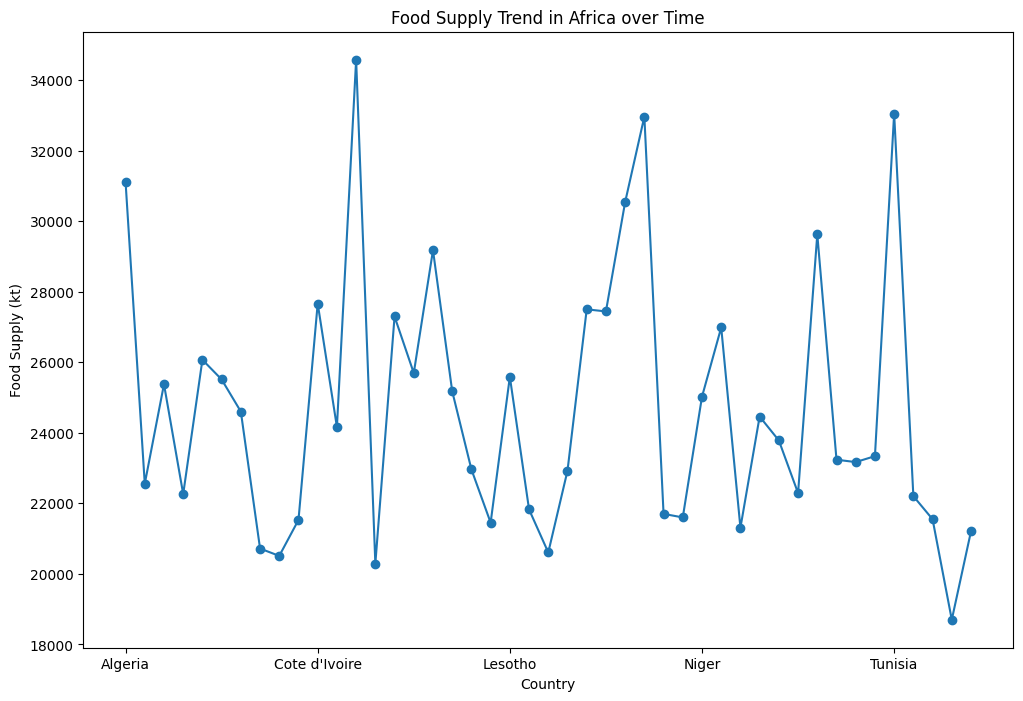

In [37]:
# Group by Country
plt.figure(figsize=(12, 8))
supply_trend = supply.groupby('Country')['Value'].sum()
supply_trend.plot(kind='line', marker='o', title='Food Supply Trend in Africa over Time')
plt.xlabel('Country')
plt.ylabel('Food Supply (kt)')
plt.show()

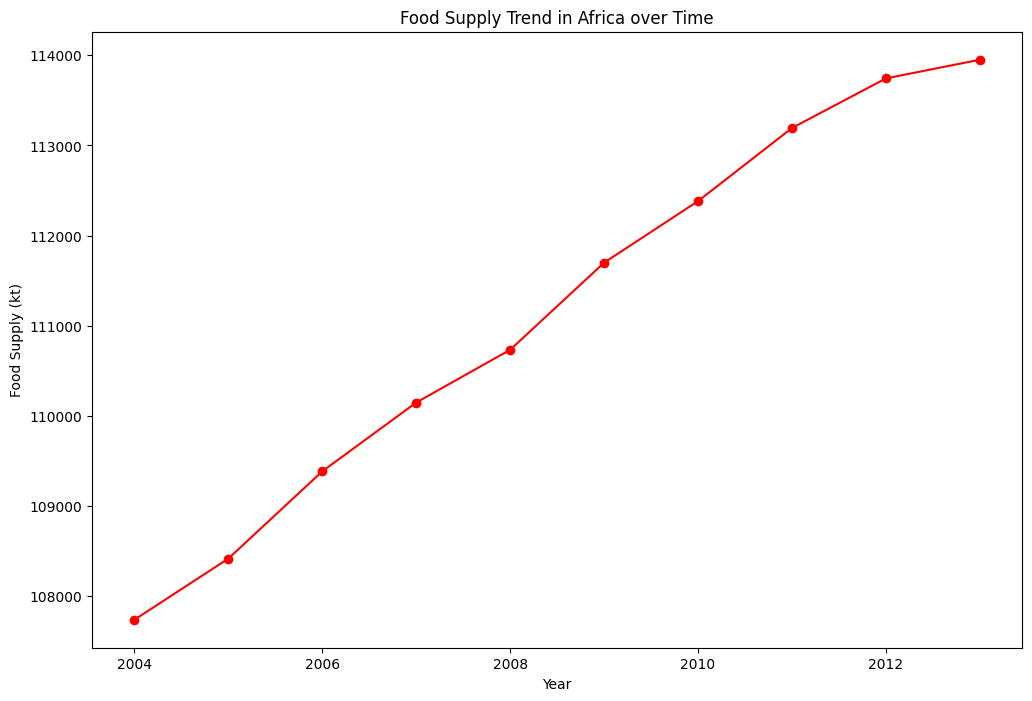

In [38]:
# Visualize the food supply over time
plt.figure(figsize=(12, 8))
supply_trend = supply.groupby('Year')['Value'].sum()
supply_trend.plot(kind='line', marker='o', color='red', title='Food Supply Trend in Africa over Time')
plt.xlabel('Year')
plt.ylabel('Food Supply (kt)')
plt.show()

## What countries had the most food supply?

In [39]:
# Sorting the dataset by food supply in descending order
supply_sorted = supply.groupby(['Country'])['Value'].sum().sort_values(ascending=False)
supply_sorted

Country
Egypt                          34580
Tunisia                        33055
Morocco                        32967
Algeria                        31118
Mauritius                      30543
South Africa                   29629
Ghana                          29180
Cote d'Ivoire                  27666
Mali                           27502
Mauritania                     27443
Gabon                          27299
Nigeria                        26988
Burkina Faso                   26072
Gambia                         25695
Lesotho                        25588
Cabo Verde                     25514
Benin                          25378
Guinea                         25180
Niger                          25024
Cameroon                       24603
Sao Tome and Principe          24462
Djibouti                       24165
Senegal                        23784
Togo                           23339
Sudan                          23238
Swaziland                      23171
Guinea-Bissau                 

Top 10 Food Items supplied:
 Country
Egypt            34580
Tunisia          33055
Morocco          32967
Algeria          31118
Mauritius        30543
South Africa     29629
Ghana            29180
Cote d'Ivoire    27666
Mali             27502
Mauritania       27443
Gabon            27299
Nigeria          26988
Burkina Faso     26072
Gambia           25695
Lesotho          25588
Cabo Verde       25514
Benin            25378
Guinea           25180
Niger            25024
Cameroon         24603
Name: Value, dtype: int64


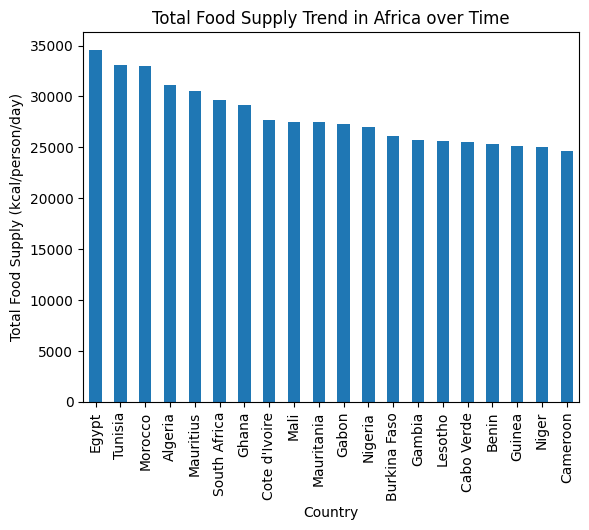

In [40]:
# What food products were supplied the most?
top20_supply = supply_sorted.head(20)
print('Top 10 Food Items supplied:\n', top20_supply)

# Plot the bar chart of Top 20 countries over time
top20_supply.plot(kind='bar', title='Total Food Supply Trend in Africa over Time')
plt.xlabel('Country')
plt.ylabel('Total Food Supply (kcal/person/day)')
plt.show()

## What countries had the least food supply?

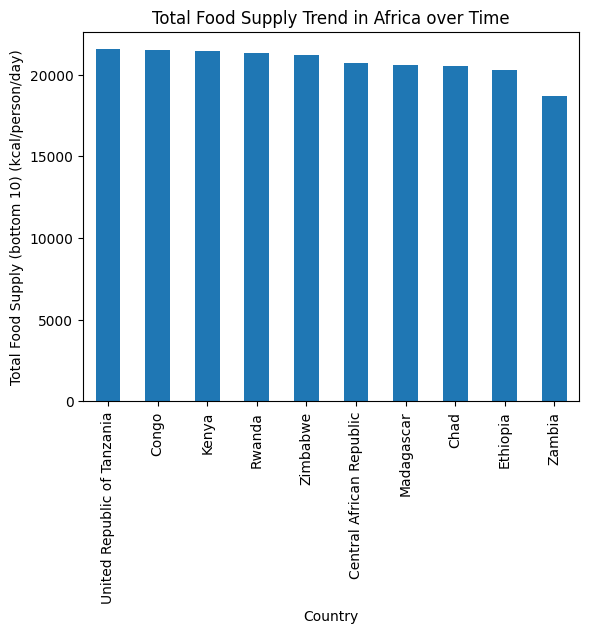

In [41]:
# Creating a bar chart of the bottom 10 countries with the lowest food supply
bottom_10 = supply_sorted.tail(10)
#print('Least 10 Food Items supplied:\n', bottom_10)

# Plot the bar chart of Least 10 countries over time
bottom_10.plot(kind='bar', title='Total Food Supply Trend in Africa over Time')
plt.xlabel('Country')
plt.ylabel('Total Food Supply (bottom 10) (kcal/person/day)')
plt.show()

In [42]:
# Load the African countries GeoJSON file
african_countries = json.load(open("african_countries.geojson"))

# Create a chloropleth map of African countries
fig = px.choropleth(
    supply,
    geojson=african_countries,
    locations=supply["Country"],
    locationmode='country names',
    color=supply['Value'],
    hover_name=supply['Country'],
    scope='africa',
    #title="Food Supply in Africa by Country and Year",
    color_continuous_midpoint=500,
    color_continuous_scale=px.colors.sequential.Plasma,
    animation_frame=supply['Year'],
    center={'lat': 7.1881, 'lon': 21.0938},
    width=600,   # Width of map
    height=600,   # Height of map

)

fig.update_layout(title='Food Supply in Africa by Country and Year',
                  margin={'l': 0, 'r': 0, 't': 50, 'b': 0})

# Display the map
fig.show()

plt.savefig("./images/map-3.png", dpi=150)

<Figure size 640x480 with 0 Axes>

In [54]:
# visualizing the food supply with plotly(Animation plot)

fig = px.scatter(supply,
             x ="Country",
             y ="Value",
             color ='Value',
             animation_frame ='Year',
             hover_name ='Country',
             title = 'Food Supply in Africa by Country',
             labels = {'Year': 'Year', 'Value':'Value (kcal/person/day)'})

fig.show()

plt.savefig("./images/scatter-plot-1.png", dpi=150)

<Figure size 640x480 with 0 Axes>

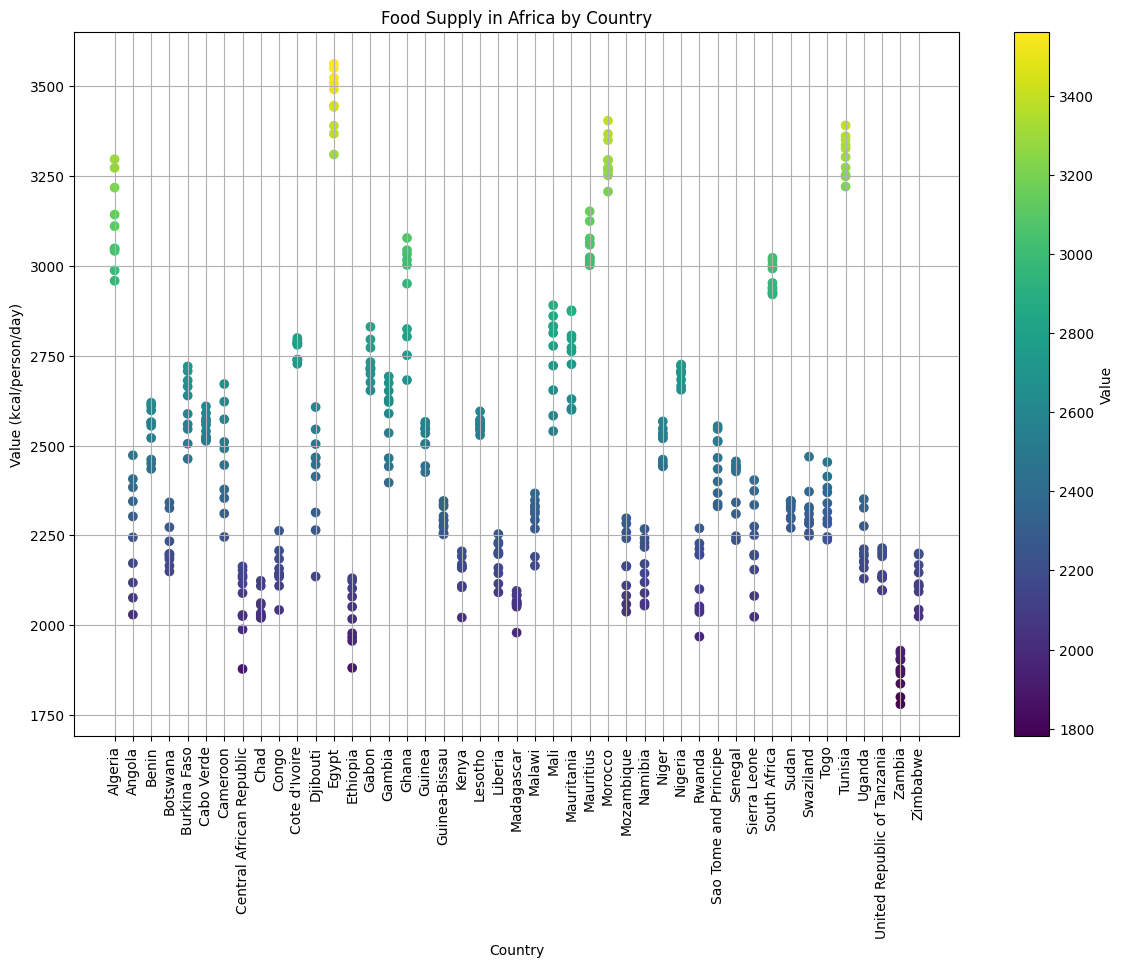

<Figure size 640x480 with 0 Axes>

In [44]:
# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(supply['Country'], supply['Value'], c=supply['Value'], cmap='viridis')

# Set the title and labels
plt.title('Food Supply in Africa by Country')
plt.xlabel('Country')
plt.ylabel('Value (kcal/person/day)')

# Add a colorbar
plt.colorbar(label='Value')
plt.tight_layout()
plt.grid(True)
plt.xticks(rotation=90)
# Show the plot
plt.show()

plt.savefig("./images/scatter-plot-2.png", dpi=150)

## Which three countries had the lowest supply between 2004 and 2006 respectively (inclusive)?

In [45]:
# Filtering the data for the years 2004 to 2006 (inclusive)
filtered_data = supply[(supply['Year'] >= 2004) & (supply['Year'] <= 2006)]

# Grouping the data by country and calculating the average food supply
grouped_data = filtered_data.groupby('Country')['Value'].mean().reset_index()

# Sorting the data by food supply in ascending order and selecting the first three rows
lowest_supply = grouped_data.sort_values(by='Value', ascending=True).head(3)

# Displaying the countries with the lowest food supply
print('Three Countries with the lowest supply between 2004 and 2006')
print(lowest_supply['Country'])

Three Countries with the lowest supply between 2004 and 2006
43                      Zambia
13                    Ethiopia
7     Central African Republic
Name: Country, dtype: object


## Detecting Outliers in Food Supply
Do we have any outliers in food supply?

In [46]:
supply_boxplot = px.box(data_frame=supply,
                             x='Year',
                             y='Value',
                             color='Year',
                             title='Box Plot for Food Supply Per Year',
                             labels = {'Year': 'Year', 'Value':'Value (kcal/person/day)'})
supply_boxplot.show()

plt.savefig("./images/box-plot-1.png", dpi=150)

<Figure size 640x480 with 0 Axes>

In [47]:
# Calculate the IQR and identify the outliers
q1 = supply['Value'].quantile(0.25)
q3 = supply['Value'].quantile(0.75)
iqr = q3 - q1
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr
outliers = supply[(supply['Value'] < lower_fence) | (supply['Value'] > upper_fence)]
outliers_countries = outliers['Country'].unique()
print('Country with the highest outlier:', outliers_countries)

Country with the highest outlier: ['Egypt']


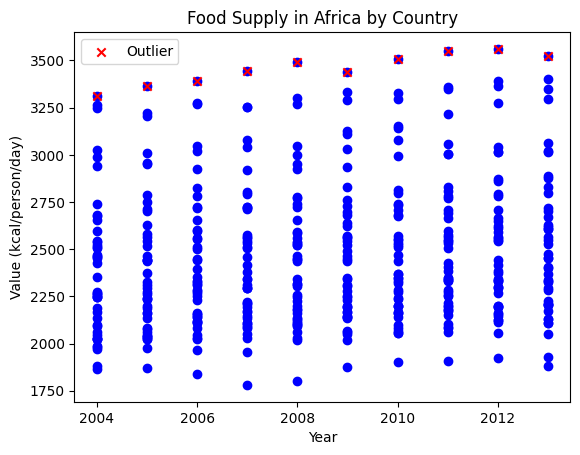

<Figure size 640x480 with 0 Axes>

In [48]:
# Create the scatter plot
plt.scatter(supply['Year'], supply['Value'], c='blue')

# Add a marker or label for the countries with outliers
for country in outliers_countries:
    country_data = supply[supply['Country'] == country]
    plt.scatter(country_data['Year'], country_data['Value'], c='red', marker='x', label='Outlier')

# Set the title and labels
plt.title('Food Supply in Africa by Country')
plt.xlabel('Year')
plt.ylabel('Value (kcal/person/day)')

# Add a legend
plt.legend()

# Show the plot
plt.show()

plt.savefig("./images/scatter-plot-3.png", dpi=150)

## Trends in food production and supply over the years

In [49]:
# Average food production and supply
avg_prod = production.groupby('Year')['Value'].mean()
avg_supply = supply.groupby('Year')['Value'].mean()

avg_prod = pd.DataFrame(avg_prod)
avg_supply = pd.DataFrame(avg_supply)

In [50]:
avg_df = avg_prod.merge(avg_supply, on='Year')
avg_df

,Value_x,Value_y
Year,,
2004,286.767301,2394.222222
2005,298.986592,2409.288889
2006,310.814014,2430.800000
2007,305.215830,2447.755556
2008,318.686851,2460.755556
2009,323.040657,2482.222222
2010,340.166955,2497.400000
2011,351.303633,2515.422222
2012,364.831816,2527.644444


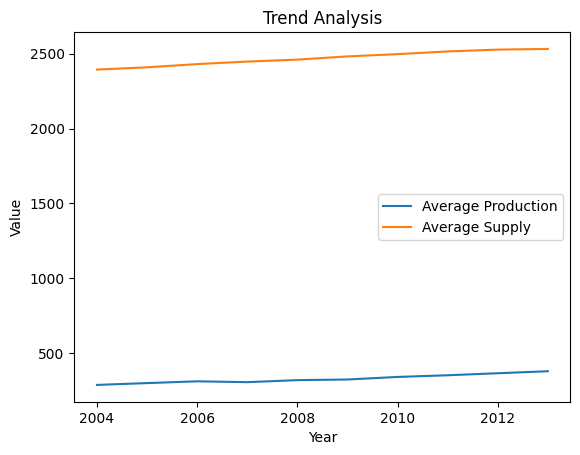

In [51]:
avg_df.rename(columns={'Value_x':'avg_prod', 'Value_y':'avg_supply'}, inplace=True)
plt.plot(avg_df.index, avg_df['avg_prod'], label='Average Production')
plt.plot(avg_df.index, avg_df['avg_supply'], label='Average Supply')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Trend Analysis')
plt.legend()
plt.show()

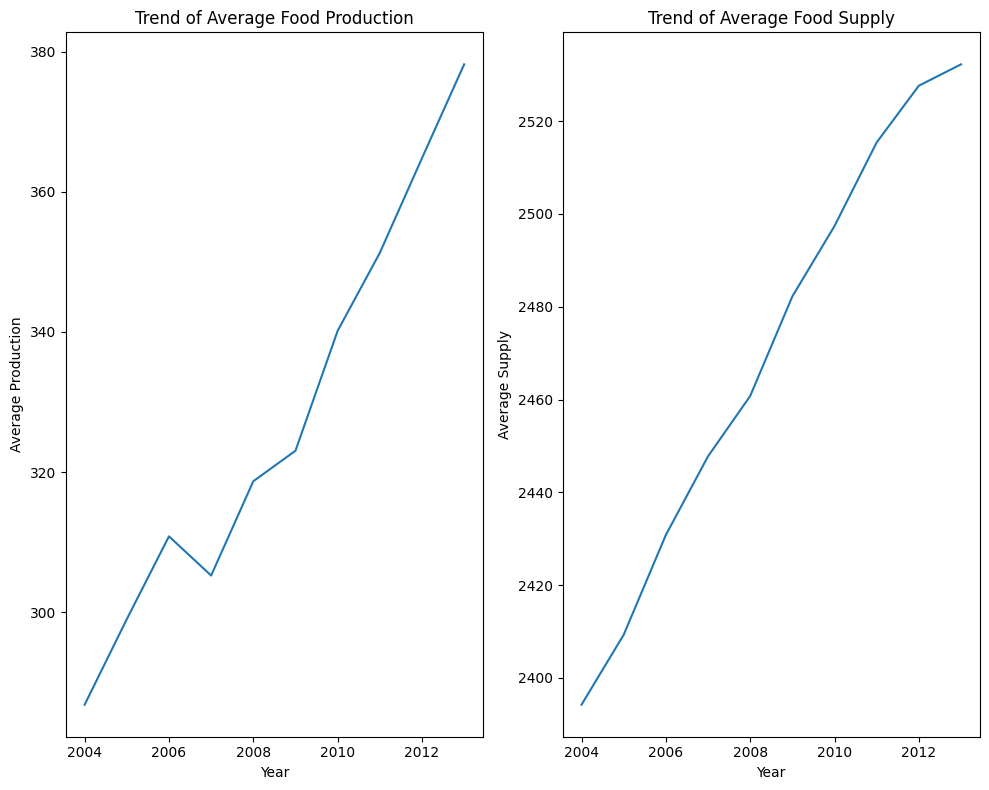

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

# Plotting average food production over time
ax1.plot(avg_df.index, avg_df['avg_prod'])
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Production')
ax1.set_title('Trend of Average Food Production')

# Plotting average food supply over time
ax2.plot(avg_df.index, avg_df['avg_supply'])
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Supply')
ax2.set_title('Trend of Average Food Supply')

plt.tight_layout()
plt.show()

## Correlation between average production and average supply.

In [53]:
correlation = avg_df['avg_prod'].corr(avg_df['avg_supply'])
print('Correlation coefficient:', correlation)

Correlation coefficient: 0.9640025214458487
